In [1]:
# ipython magic

# %reset -f
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [1]:
import os
import time
import sys
sys.path.append(os.path.expanduser('~/Documents/Code/Vape'))

# Path to suite2p (if git cloned to code folder rather than pip installed)
s2p_path = os.path.expanduser('~/Documents/Code/suite2p')
sys.path.append(s2p_path)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import utils.interareal_combined_class as iac
import pickle
import tifffile as tf
from scipy import spatial, stats

['/home/rlees/Documents/Code/suite2p/suite2p']


### Define paths

In [2]:
# qnap_path = r'Q:\Data' # for Windows
qnap_data_path = '/home/rlees/mnt/qnap/Data' # for Ubuntu

qnap_path = qnap_data_path[:-5]

pkl_folder = os.path.join(qnap_path, 'pkl_files')
master_path = os.path.join(qnap_path, 'master_pkl', 'master_obj.pkl')

fig_save_path = os.path.join(qnap_path, 'Analysis', 'Plots')
stam_save_path = os.path.join(qnap_path, 'Analysis', 'STA_movies')
s2_borders_path = os.path.join(qnap_path, 'Analysis', 'S2_borders')

print('QNAP_path:', qnap_path,
      '\nQNAP_data_path', qnap_data_path,
      '\nPickle folder:', pkl_folder,
      '\nMaster pickle:', master_path,
      '\nFigure save path:', fig_save_path,
      '\nSTA movie save path:', stam_save_path,
      '\nS2 borders path:', s2_borders_path)

QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Plots 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


### Run experiments through analysis pipeline using metadata from Google Sheets

In [6]:
ss_id = '1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY'
sheet_names = [
#                 '2019-06-11_J048',
#                 '2019-06-13_J052',
#                 '2019-06-25_RL048',
#                 '2019-07-15_RL052',
#                 '2019-08-14_J058',
#                 '2019-08-14_J059',
#                 '2019-08-15_RL055',
#                 '2019-11-14_J061',
#                 '2019-11-14_J063',
#                 '2019-11-15_J064',
#                 '2019-11-18_J065',
#                 '2020-02-27_RL075',
#                 '2020-03-03_RL074',
#                 '2020-03-05_RL070',
#                 '2020-03-05_RL072',
#                 '2020-03-12_RL070',
#                 '2020-03-16_RL074',
#                 '2020-03-19_RL075',
                '2020-03-20_RL080'
              ]

for sheet_name in sheet_names:
    
    # Initialise the class
    exp_obj = iac.experimentInfo(ss_id, sheet_name, qnap_data_path)
    
#     # Run s2p on this experiment (if not already done)
#     exp_obj.s2pRun()
    
    # Get the range of frames that are attributed to each experiment (from the concatenated t-series)
    exp_obj.getFrameRanges()
    
    # Process the s2p data (after manual curation)
    exp_obj.photostim_r.s2pProcessing(s2_borders_path)
    exp_obj.photostim_s.s2pProcessing(s2_borders_path)
    exp_obj.whisker_stim.s2pProcessing(s2_borders_path)
    
    # Add sham photostim metadata
    exp_obj.addShamPhotostim()
    
    # DELETE BELOW ONCE I KNOW THE ABOVE WORKS
#     exp_obj.spont.stim_start_frames = exp_obj.photostim_r.stim_start_frames
#     exp_obj.spont.naparm_path = exp_obj.photostim_r.naparm_path
#     exp_obj.spont.spiral_size = exp_obj.photostim_r.spiral_size 
#     exp_obj.spont.duration_frames = exp_obj.photostim_r.duration_frames
#     exp_obj.spont.stim_dur = exp_obj.photostim_r.stim_dur
#     exp_obj.spont.single_stim_dur = exp_obj.photostim_r.single_stim_dur
#     exp_obj.spont.n_shots = exp_obj.photostim_r.n_shots
#     exp_obj.spont.n_groups = exp_obj.photostim_r.n_groups
#     exp_obj.spont.n_trials = exp_obj.photostim_r.n_trials
#     exp_obj.spont.inter_point_delay = exp_obj.photostim_r.inter_point_delay
#     exp_obj.spont.targeted_cells = exp_obj.photostim_r.targeted_cells
#     exp_obj.spont.n_targets = exp_obj.photostim_r.n_targets
    
    exp_obj.spont.s2pProcessing(s2_borders_path)
    
    # Pickle the object output to save it for analysis
    pkl_path = os.path.join(pkl_folder, sheet_name + '.pkl')
    
    with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)


Fetching paths and stim types for: 2020-03-20_RL080
Umbrella folder: /home/rlees/mnt/qnap/Data/2020-03-20
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-002']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-002.paq']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-003']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-005']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_NAPARM_003']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-005.paq']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-006']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_NAPARM_002']
['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-006.paq']
Experimental info = (array(['/home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-005',
       '/home/rlees/mnt/qnap/Data/

/home/rlees/Documents/Code/Vape/utils/interareal_combined_class.py:765: RuntimeWarning: divide by zero encountered in float_scalars
  trial = [ ( (f-baseline) / baseline) * 100 for f in trial ] #dff calc
/home/rlees/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


performing t-test on cells with multiple comparisons correction


/home/rlees/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


Number of targets: 22
Searching for targeted cells...
Search completed.
Number of targeted cells:  51
Creating and savings target cell masks from s2p...
Done
Creating and savings all cell masks from s2p...
Done
Creating and savings s2 cell masks from s2p...
Done
Saving mean image...

Processing s2p data for this  ps  experiment type
Loading 2591 traces labelled as cells
Subtracting neuropil with a coefficient of 0.7
performing t-test on cells with multiple comparisons correction
Number of targets: 22
Searching for targeted cells...
Search completed.
Number of targeted cells:  50
Creating and savings target cell masks from s2p...
Done
Creating and savings all cell masks from s2p...
Done
Creating and savings s2 cell masks from s2p...
Done
Saving mean image...

Processing s2p data for this  w  experiment type
Loading 2591 traces labelled as cells
Subtracting neuropil with a coefficient of 0.7
performing t-test on cells with multiple comparisons correction
Creating and savings whisker resp

### Add or check attributes in all exp_obj pkl files

2019-06-11_J048.pkl
2019-06-13_J052.pkl
2019-06-25_RL048.pkl
2019-07-15_RL052.pkl
2019-08-14_J058.pkl
2019-08-14_J059.pkl
2019-08-15_RL055.pkl
2019-11-14_J061.pkl
2019-11-14_J063.pkl
2019-11-15_J064.pkl
2019-11-18_J065.pkl
2020-02-27_RL075.pkl
2020-03-03_RL074.pkl
2020-03-05_RL070.pkl
2020-03-05_RL072.pkl
2020-03-12_RL070.pkl
2020-03-16_RL074.pkl
2020-03-19_RL075.pkl
2020-03-20_RL080.pkl


IndexError: index 18 is out of bounds for axis 0 with size 18

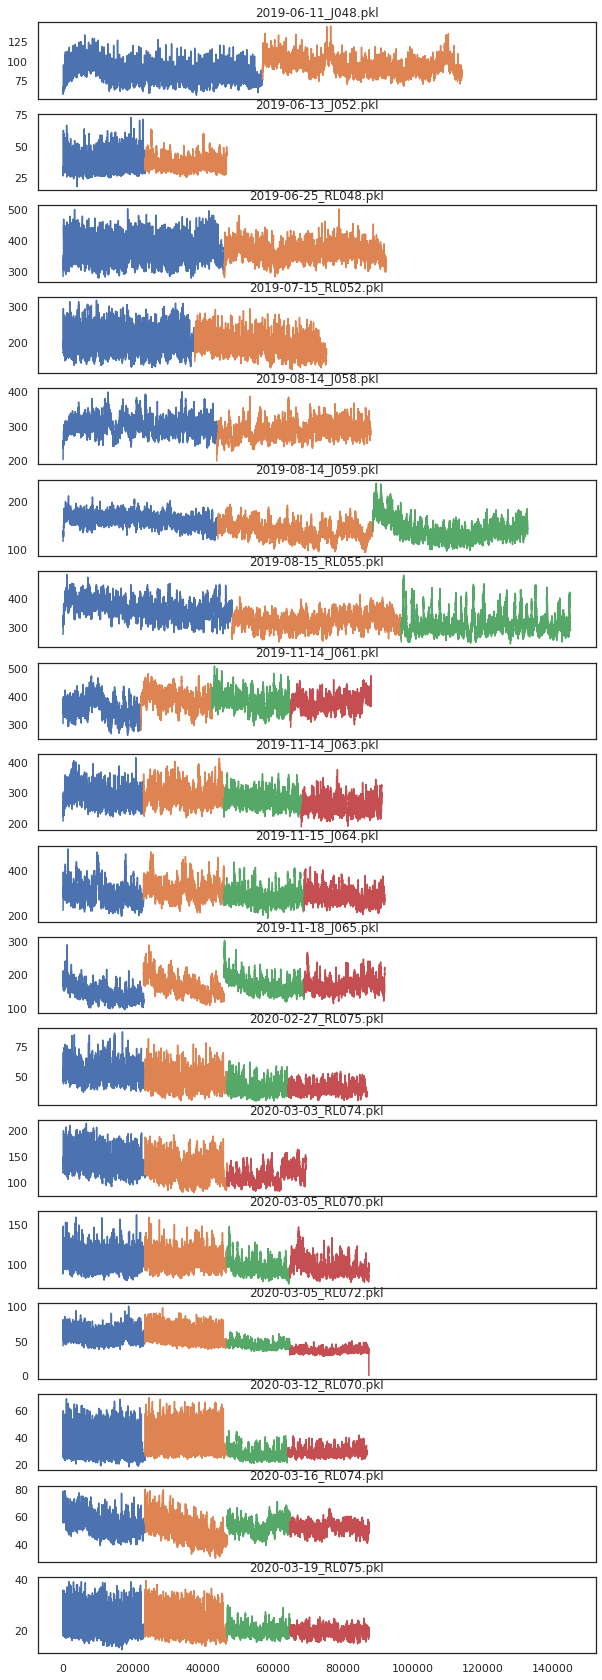

In [4]:
pkl_files = os.listdir(pkl_folder)

fig, ax = plt.subplots(nrows=len(pkl_files)-1, ncols=1, figsize=(10,30), sharex=True)

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        print(pkl)
        
        pkl_path = os.path.join(pkl_folder, pkl)

        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)

#     obj_list = []

#     obj_list.append(exp_obj.photostim_r)
#     obj_list.append(exp_obj.photostim_s)
    
#     if exp_obj.whisker_stim.n_frames > 0:
#         obj_list.append(exp_obj.whisker_stim)
#     if exp_obj.spont.n_frames > 0:
#         obj_list.append(exp_obj.spont)
        
#     print(exp_obj.sheet_name)
#     print(exp_obj.photostim_r.frame_x)
#     print(exp_obj.photostim_r.frame_y)
#     print(exp_obj.photostim_r.pix_sz_x)
#     print(exp_obj.photostim_r.pix_sz_y)
    
#     for obj in obj_list:
#         print(obj.stim_type, end=' ')
#         print(obj.frames)
#         print((obj.n_frames/obj.fps)/60)
        
#     exp_obj.spont.targeted_cells = exp_obj.photostim_r.targeted_cells
#     exp_obj.spont.n_targets = exp_obj.photostim_r.n_targets
    
#     with open(pkl_path, 'wb') as f:
#         pickle.dump(exp_obj, f)

### Re-create master object from scratch listing information from all experiments

In [4]:
master_obj = iac.interarealPlotting(pkl_folder)

with open(master_path, 'wb') as f:
    pickle.dump(master_obj, f)

/home/rlees/mnt/qnap/pkl_files/2019-06-11_J048.pkl
/home/rlees/mnt/qnap/pkl_files/2019-06-13_J052.pkl
/home/rlees/mnt/qnap/pkl_files/2019-06-25_RL048.pkl
/home/rlees/mnt/qnap/pkl_files/2019-07-15_RL052.pkl
/home/rlees/mnt/qnap/pkl_files/2019-08-14_J058.pkl
/home/rlees/mnt/qnap/pkl_files/2019-08-14_J059.pkl
/home/rlees/mnt/qnap/pkl_files/2019-08-15_RL055.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-14_J061.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-14_J063.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-15_J064.pkl
/home/rlees/mnt/qnap/pkl_files/2019-11-18_J065.pkl


### See the variables that are attributed to the master object

In [5]:
for key, value in vars(master_obj).items():
    print(key)

pkl_folder
pkl_name
pkl_path
n_units
n_targets
n_targeted_cells
targeted_cells
s1_cells
stim_dur
stim_freq
stim_type
sheet_name
tiff_path
fps
df
new_pkls
temp_df


### Add new pickle files to the master object

In [ ]:
# master_obj.addPickles()

# with open(master_path, 'wb') as f:
#     pickle.dump(master_obj, f)

### Plot summary statistics and other analytics

Plotting summary statistic for all experiments: target_responders_sta
Plotting summary statistic for all experiments: s2_sta


No handles with labels found to put in legend.


Plotting stimulus triggered average for all experiments: target_sta
Plotting scatter and slopes for S1 vs S2 for all experiments: ['target_sum_dff', 'positive_s2_responders_trial']
2019-11-14_J061
Similar: 9 out of 23
Random: 14 out of 19
2019-11-14_J063
Similar: 2 out of 12
Random: 11 out of 19
2019-11-15_J064
Similar: 10 out of 25
Random: 18 out of 26
2019-11-18_J065
Similar: 6 out of 24
Random: 6 out of 18


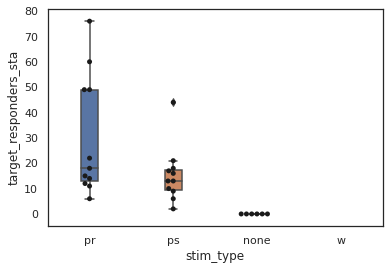

<Figure size 432x288 with 0 Axes>

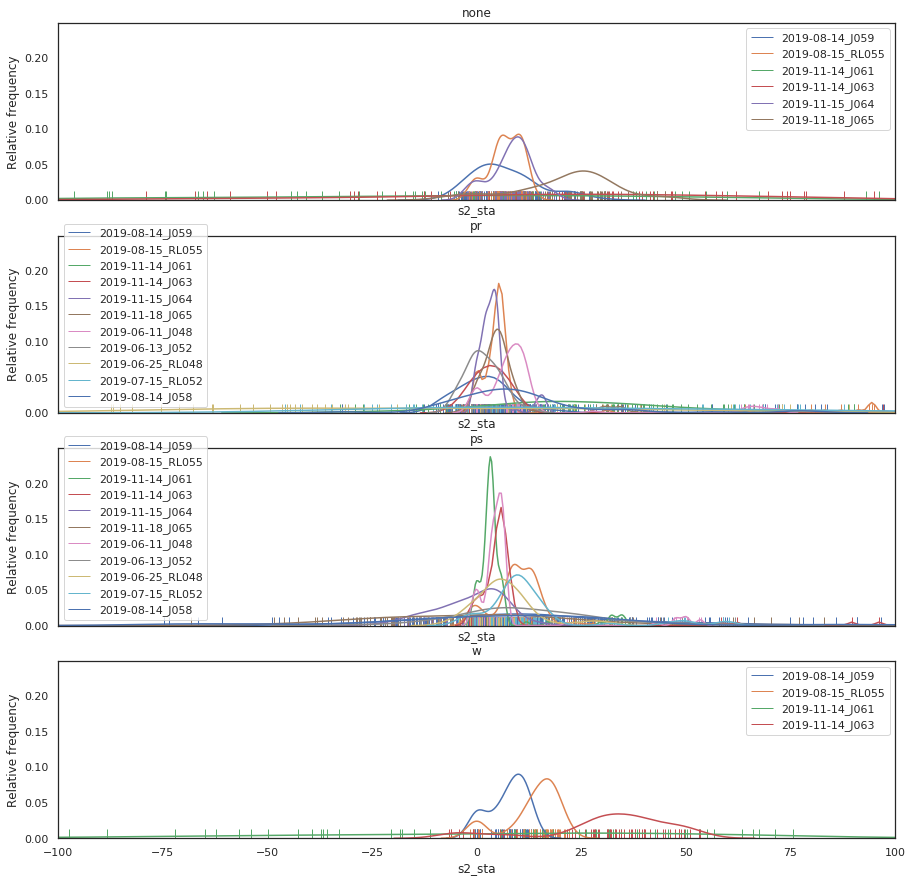

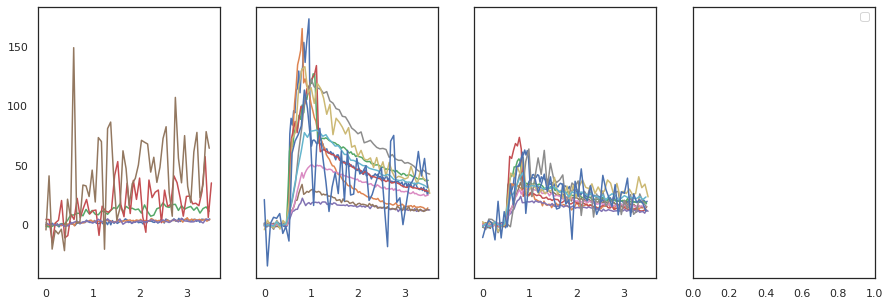

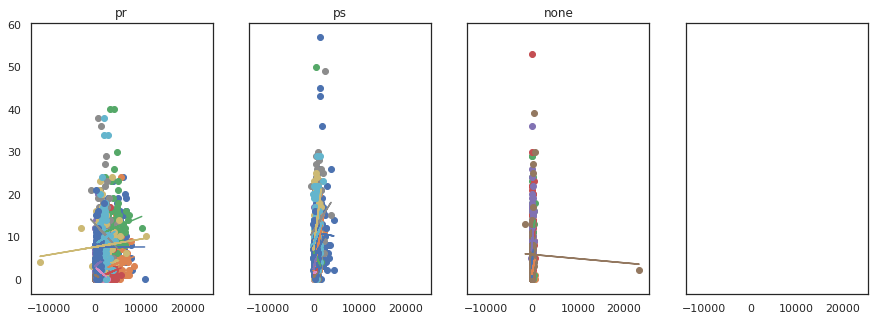

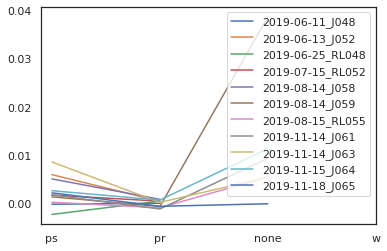

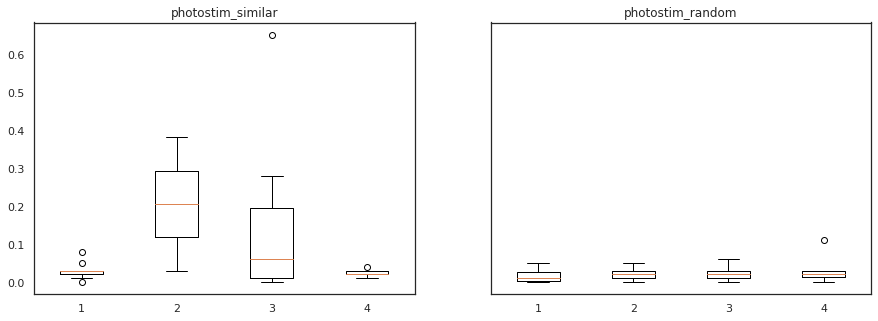

In [4]:
with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)

# Plot probability of response on whisker trials for 'ps' and 'pr' target responders
# master_obj.plotWhiskerBias()
    
# Plot mean STA dFF amplitude across all cells in group
# master_obj.boxplotSummaryStat('target_sta_amp')
# plt.savefig(os.path.join(fig_save_path, 'target_sta_amp.svg'))
# master_obj.boxplotSummaryStat('non_target_sta_amp')
# master_obj.boxplotSummaryStat('s2_sta_amp')
# master_obj.boxplotSummaryStat('stim_freq')
# master_obj.boxplotSummaryStat('positive_s2_responders_sta')
master_obj.boxplotSummaryStat('target_responders_sta')
# plt.savefig(os.path.join(fig_save_path, 'positive_s2_responders_sta.svg'))

# Plot distribution of STA amplitudes across all cells in group
master_obj.distributionSummaryStat('s2_sta')

# Plot mean STA dFF trace across all cells in group
master_obj.lineplotSTA('target_sta')
# plt.savefig(os.path.join(fig_save_path, 'target_sta.svg'))
# master_obj.lineplotSTA('non_target_sta')
# master_obj.lineplotSTA('s2_sta')

# Plot probability of response for each stim separately for each animal
# master_obj.boxplotProbResponse(to_mask='target_cells')
# plt.savefig(os.path.join(fig_save_path, 'prob_response_boxplot.svg'))

# Plot probability of response for each cell across two different stim types
# master_obj.scatterProbResponse(to_mask='target_cells')
# plt.savefig(os.path.join(fig_save_path, 'prob_response_scatter.svg'))

# Plot reliable responders over 100 trials (STA)
# master_obj.scatterResponseSTA(['target_responders_sta', 'positive_s2_responders_sta'], proportion=False)
# master_obj.scatterResponseSTA(['positive_s1_responders_sta', 'positive_s2_responders_sta'], proportion=True)

# Plot all responders per trial (> 2 S.D. of baseline)
# master_obj.scatterResponseTrial(['target_responders_trial_sum', 'positive_s2_responders_trial'], proportion=True)
# master_obj.scatterResponseTrial(['target_responders_trial_sum', 'positive_s2_responders_trial'])
# master_obj.scatterResponseTrial(['positive_s1_responders_trial', 'positive_s2_responders_trial'], proportion=True)
# master_obj.scatterResponseTrial(['positive_s1_responders_trial', 'positive_s2_responders_trial'])
master_obj.scatterResponseTrial(['target_sum_dff', 'positive_s2_responders_trial'])
# master_obj.scatterResponseTrial(['num_whisker_targets', 'positive_s2_responders_trial'])
# master_obj.scatterResponseTrial(['euclid_dist', 'positive_s2_responders_trial'])

# Plot whisker bias of targets
master_obj.boxplotWhiskerBias()

### Make STA movies

In [7]:
with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)

pkl_list = [
#             '2019-06-11_J048.pkl',
#             '2019-06-13_J052.pkl',
#             '2019-06-25_RL048.pkl',
#             '2019-07-15_RL052.pkl',
#             '2019-08-14_J058.pkl',
#             '2019-08-14_J059.pkl',
#             '2019-08-15_RL055.pkl',
#             '2019-11-14_J061.pkl',
#             '2019-11-14_J063.pkl',
#             '2019-11-15_J064.pkl',
#             '2019-11-18_J065.pkl',
#             '2020-02-27_RL075.pkl',
#             '2020-03-03_RL074.pkl',
#             '2020-03-05_RL070.pkl',
#             '2020-03-05_RL072.pkl',
#             '2020-03-12_RL070.pkl',
#             '2020-03-16_RL074.pkl',
#             '2020-03-19_RL075.pkl',
            '2020-03-20_RL080.pkl'
           ]

for i,pkl in enumerate(pkl_list):
    pkl_list[i] = os.path.join(qnap_path, 'pkl_files', pkl)
    
master_obj.staMovie(stam_save_path, pkl_list)


Making STA movie for: /home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-005
STA movie made for 100 trials: /home/rlees/mnt/qnap/Analysis/STA_movies/2020-03-20_RL080_t-005_Cycle00001_Ch3.tif_plane0.tif

Making STA movie for: /home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-006
STA movie made for 100 trials: /home/rlees/mnt/qnap/Analysis/STA_movies/2020-03-20_RL080_t-006_Cycle00001_Ch3.tif_plane0.tif

Making STA movie for: /home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-003
STA movie made for 100 trials: /home/rlees/mnt/qnap/Analysis/STA_movies/2020-03-20_RL080_t-003_Cycle00001_Ch3.tif_plane0.tif

Making STA movie for: /home/rlees/mnt/qnap/Data/2020-03-20/2020-03-20_RL080/2020-03-20_RL080_t-002
STA movie made for 100 trials: /home/rlees/mnt/qnap/Analysis/STA_movies/2020-03-20_RL080_t-002_Cycle00001_Ch3.tif_plane0.tif


### Play with dataframes from master object

In [ ]:
with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)

df = master_obj.df
print(df.columns)

In [ ]:
df

In [ ]:
# Test data to play with experimental objects

# '2019-06-11_J048',
# '2019-06-13_J052',
# '2019-06-25_RL048',
# '2019-07-15_RL052',
# '2019-08-14_J058',
# '2019-08-14_J059',
# '2019-08-15_RL055',
# '2019-11-14_J061',
# '2019-11-14_J063',
# '2019-11-15_J064',
# '2019-11-18_J065',
# '2020-02-27_RL075'

pkl_path = os.path.join(pkl_folder, r'don't include', '2020-02-27_RL075.pkl')

with open(pkl_path, 'rb') as f:
    exp_obj = pickle.load(f)

# with open(pkl_path, 'wb') as f:
#     pickle.dump(exp_obj, f)

In [ ]:
# Show all attributes in exp_obj or sub_objs

# for key, value in vars(exp_obj).items():
#     print(key)

for key, value in vars(exp_obj.photostim_s).items():
    print(key)

In [ ]:
# Play with whisker_stim data

# Calculate the number of cells that responded both to whisker stim and photostim

a = np.where(exp_obj.whisker_stim.sta_sig[0])
b = np.where(exp_obj.photostim_r.sta_sig[0])
print(a,b)
sum(1 for i in b[0] if i in a[0])

# Plot whisker stim trials where cells went over 200 dFF

# plt.figure(figsize=(5,10))
# sta_mean = []

# for i, sta in enumerate(exp_obj.whisker_stim.stas[0]):
#     if exp_obj.whisker_stim.sta_sig[0][i]:
#         plt.plot(sta, alpha=0.2)
#         sta_mean.append(sta)
    
#         if exp_obj.whisker_stim.sta_amplitudes[0][i] > 200:
#             print(exp_obj.whisker_stim.cell_id[0][i])
            
# sta_mean = np.mean(sta_mean, axis=0)

# plt.plot(sta_mean, 'k', linewidth=2)

# plt.axis([0, 55, -10, 300])

### Plot fluorescence across all concatenated t-series frames

In [ ]:
pkl_files = os.listdir(pkl_folder)

fig, ax = plt.subplots(nrows=len(pkl_files)-1, ncols=1, figsize=(10,30), sharex=True)

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        print(pkl)
        
        pkl_path = os.path.join(pkl_folder, pkl)

        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        sub_obj = exp_obj.photostim_r
        
        mean_f = np.mean(sub_obj.raw[0], axis=0)
        
        count = 0
        
        for frames in exp_obj.frame_list:
            x = range(count,count+frames)
            ax[i].plot(x, mean_f[x]);
            ax[i].set_title(pkl)
            
            count += frames

In [ ]:
# Recreate STA postage of cells (function with input of a single cell ID, or coordinate of a target location?)

# Maybe make the STA movie from the frames that are relevant, adding it to the first stack. 
# I.e. Load stack 1, add stack 2... add stack n and then divide by the number of trials to get the STA
# Save the STA for later cropping using ROIs

# Alternatively for each trial (as an additional argument) look at the postage stamp for that trial
# to see if it look like a cell increasing in intensity

pkl_folder = r'P:\rlees\pkl_files'
plane = 0

# Need to find bounding box of cell from x and y pix extremes and make a border around that to crop STA
# ORIGIN = top-left, y = 0, x = 0

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        print(exp_obj.tiff_path)
        
        try:
            output_dir = os.path.join(exp_obj.tiff_path, 'targ_cells_dff')
            os.mkdir(output_dir)
        except:
            print('Could not make directory.')
            
        for trial in range(exp_obj.n_trials):

            for cell,_ in enumerate(exp_obj.cell_id[0]):

                if exp_obj.targeted_cells[cell]==1 and exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0:
#                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 20:

                    min_x = np.min(exp_obj.cell_x[plane][cell])
                    max_x = np.max(exp_obj.cell_x[plane][cell])
                    width_cell = max_x - min_x

                    min_y = np.min(exp_obj.cell_y[plane][cell])
                    max_y = np.max(exp_obj.cell_y[plane][cell])
                    height_cell = max_y - min_y

                    bd_x_start = (min_x - 10)
                    bd_width = width_cell + 20
                    bd_x_stop = bd_x_start + bd_width
                    
                    if bd_x_start < 0:
                        bd_x_start = 0
                        
                    if bd_x_stop > exp_obj.frame_x:
                        bd_x_stop = exp_obj.frame_x
                        
                    bd_y_start = (min_y - 10)
                    bd_height = height_cell + 20
                    bd_y_stop = bd_y_start + bd_height
                    
                    if bd_y_start < 0:
                        bd_y_start = 0
                        
                    if bd_y_stop > exp_obj.frame_y:
                        bd_y_stop = exp_obj.frame_y

                    frame_start = exp_obj.stim_start_frames[plane][trial]
                    trial_start = frame_start - exp_obj.pre_frames
                    trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                    for file in os.listdir(exp_obj.tiff_path):
                        if '.tif' in file:
                            tiff_file = os.path.join(exp_obj.tiff_path, file)
                            trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                            trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                            baseline_avg = np.mean(trial_baseline, 0)

                            df_stack = trial_stack - baseline_avg
                            dff_stack = df_stack/baseline_avg * 100
                            dff_stack = dff_stack.astype('uint32')

                            cell_stack = dff_stack[-10:,bd_y_start:bd_y_stop, bd_x_start:bd_x_stop]
                            break

                    output_path = os.path.join(exp_obj.tiff_path, 'targ_cells_dff', file + '_plane' + str(plane) + '_cell' + str(cell) + '_trial' + str(trial) + '.tif')
                    tf.imwrite(output_path, cell_stack)